# WeatherPy - Liberty Heise

Analysis:  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
units = "metric"
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):  
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city.replace(' ','+')}"
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1
    try:
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

    #Append the City information into city_data list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})
        #print(f"{city}{len(city_data)}")

    except:
        print(f"City {city} not found. Skipping...")
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | rocha
Processing Record 7 of Set 1 | ximei
Processing Record 8 of Set 1 | havoysund
Processing Record 9 of Set 1 | khatanga
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | norman wells
Processing Record 18 of Set 1 | ballina
Processing Record 19 of Set 1 | klyuchi
Processing Record 20 of Set 1 | reguengos de monsaraz
Processing Record 21 of Set 1 | haibowan
City haibowan not found. Skipping...
Processing Record 22 of Set 1 | g

In [4]:
# Convert the cities weather data into a Pandas DataFrame
weather_data_df = pd.DataFrame(city_data)

In [5]:
# Display sample data
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,19.77,67,0,4.63,US,1667612409
1,vaini,-21.2000,-175.2000,27.09,74,20,4.63,TO,1667612404
2,tiksi,71.6872,128.8694,-19.41,98,97,0.51,RU,1667612610
3,rikitea,-23.1203,-134.9692,21.69,70,8,6.52,PF,1667612386
4,punta arenas,-53.1500,-70.9167,12.06,76,75,2.57,CL,1667612550


In [6]:
# Export the City_Data into a csv
weather_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,19.77,67,0,4.63,US,1667612409
1,vaini,-21.2000,-175.2000,27.09,74,20,4.63,TO,1667612404
2,tiksi,71.6872,128.8694,-19.41,98,97,0.51,RU,1667612610
3,rikitea,-23.1203,-134.9692,21.69,70,8,6.52,PF,1667612386
4,punta arenas,-53.1500,-70.9167,12.06,76,75,2.57,CL,1667612550


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

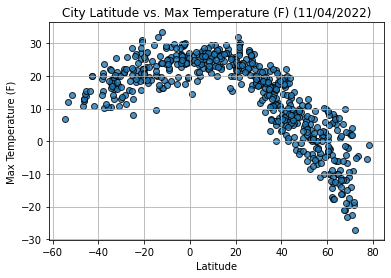

In [8]:
# Build scatter plot for latitude vs. temperature

date = time.strftime("%m/%d/%Y")
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, alpha = 0.8, edgecolor = "k")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature (F) ({date})')
plt.grid(True)

# Save the figure
plt.savefig("output_data/LatitudeVsTemperaturePlot.png")

# Show plot
plt.show()



#### Latitude Vs. Humidity

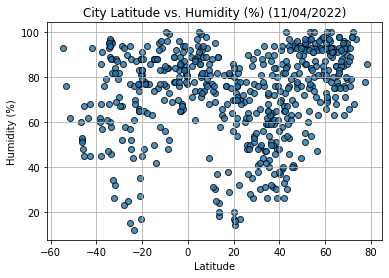

In [9]:
# Build the scatter plots for latitude vs. humidity
date = time.strftime("%m/%d/%Y")
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity (%) ({date})')
plt.grid(True)

# Save the figure
plt.savefig("output_data/LatitudeVsHumidtyPlot.png")

# Show plot
plt.show()



#### Latitude Vs. Cloudiness

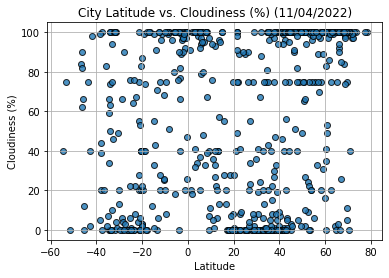

In [10]:
# Build the scatter plots for latitude vs. cloudiness
date = time.strftime("%m/%d/%Y")
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness (%) ({date})')
plt.grid(True)

# Save the figure
plt.savefig("output_data/LatitudeVsCloudinessPlot.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

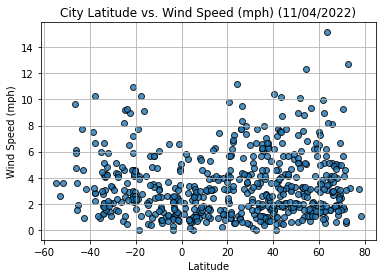

In [11]:
# Build the scatter plots for latitude vs. wind speed
date = time.strftime("%m/%d/%Y")
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed (mph) ({date})')
plt.grid(True)

# Save the figure
plt.savefig("output_data/LatitudeVsWindSpeedPlot.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
north_df = city_data_df.loc[city_data_df["Lat"]>=0]
south_df = city_data_df.loc[city_data_df["Lat"]<0]


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,19.77,67,0,4.63,US,1667612409
2,tiksi,71.6872,128.8694,-19.41,98,97,0.51,RU,1667612610
6,ximei,24.9639,118.3794,21.45,60,89,3.92,CN,1667612612
7,havoysund,70.9963,24.6622,4.13,76,100,1.63,NO,1667612613
8,khatanga,71.9667,102.5000,-27.13,100,97,0.65,RU,1667612432


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vaini,-21.2000,-175.2000,27.09,74,20,4.63,TO,1667612404
3,rikitea,-23.1203,-134.9692,21.69,70,8,6.52,PF,1667612386
4,punta arenas,-53.1500,-70.9167,12.06,76,75,2.57,CL,1667612550
5,rocha,-34.4833,-54.3333,10.50,95,0,1.87,UY,1667612612
10,puerto ayora,-0.7393,-90.3518,19.22,81,97,4.69,EC,1667612422


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7672442521327965


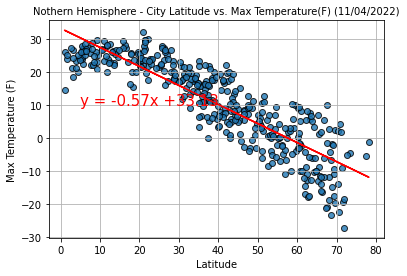

In [15]:
# Linear regression on Northern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = north_df['Lat']
y_values = north_df['Max Temp']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(5,10),fontsize = 15,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Nothern Hemisphere - City Latitude vs. Max Temperature(F) ({date})', fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save the figure
plt.savefig("output_data/NorthernHemisphereLatitudeVsTemperaturePlot.png")

# Show plot
plt.show()

The r-value is: 0.4102635940675339


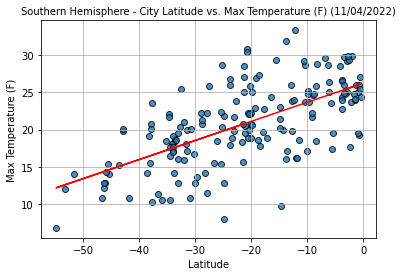

In [16]:
# Linear regression on Southern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = south_df['Lat']
y_values = south_df['Max Temp']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(-50,90),fontsize = 15,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Southern Hemisphere - City Latitude vs. Max Temperature (F) ({date})', fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save the figure
plt.savefig("output_data/SouthernHemisphereLatitudeVsTemperaturePlot.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
As one moves closer to the equator (lat is closer to zero)the temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.07649809351404825


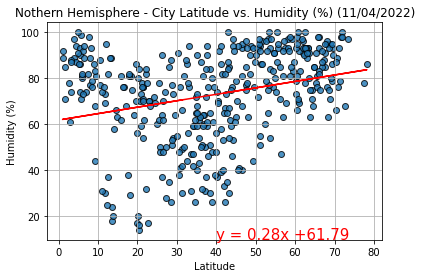

In [17]:
# Northern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = north_df['Lat']
y_values = north_df['Humidity']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(40,10),fontsize = 15,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Nothern Hemisphere - City Latitude vs. Humidity (%) ({date})')
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save the figure
plt.savefig("output_data/NorthernHemisphereLatitudeVsHumidityPlot.png")

# Show plot
plt.show()

The r-value is: 0.059446688443334596


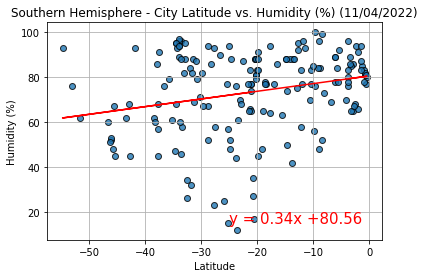

In [18]:
# Southern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = south_df['Lat']
y_values = south_df['Humidity']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(-25,15),fontsize = 15,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere - City Latitude vs. Humidity (%) ({date})')
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save the figure
plt.savefig("output_data/SouthernHemisphereLatitudeVsHumidityPlot.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
There is no direct correlation between latitidue and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0759831390186092


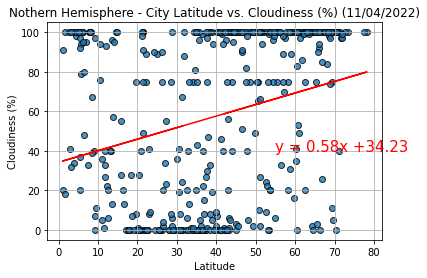

In [19]:
# Northern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = north_df['Lat']
y_values = north_df['Cloudiness']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(55,40),fontsize = 15,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Nothern Hemisphere - City Latitude vs. Cloudiness (%) ({date})')
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save the figure
plt.savefig("output_data/NorthernHemisphereLatitudeVsCloudinessPlot.png")

# Show plot
plt.show()

The r-value is: 0.1050664153808195


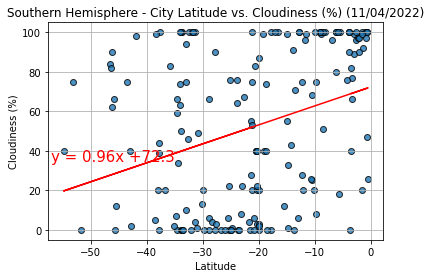

In [20]:
# Southern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = south_df['Lat']
y_values = south_df['Cloudiness']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(-57,35),fontsize = 15,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Southern Hemisphere - City Latitude vs. Cloudiness (%) ({date})')
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save the figure
plt.savefig("output_data/SouthernHemisphereLatitudeVsCloudinessPlot.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
Cloudiness increases as one moves closer to the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02188333312946371


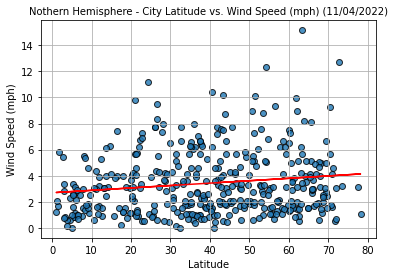

In [21]:
# Northern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = north_df['Lat']
y_values = north_df['Wind Speed']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(30,25),fontsize = 15,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Nothern Hemisphere - City Latitude vs. Wind Speed (mph) ({date})', fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save the figure
plt.savefig("output_data/NorthernHemisphereLatitudeVsWindSpeedPlot.png")

# Show plot
plt.show()

The r-value is: 0.05729464914271199


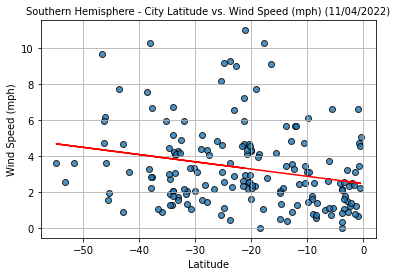

In [22]:
# Southern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = south_df['Lat']
y_values = south_df['Wind Speed']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(-57,25),fontsize = 15,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere - City Latitude vs. Wind Speed (mph) ({date})', fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save the figure
plt.savefig("output_data/SouthernHemisphereLatitudeVsWindSpeedPlot.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
Wind Speed slightly decreases as one moves closer to the equator.